In [61]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [71]:
import pandas as pd

# 데이터를 먼저 로드합니다.
df= pd.read_table("/Users/ohheungchan/workspace/AI_Study/heart+disease/reprocessed.hungarian.data", sep=' ', header=None)

# 열 이름을 변경합니다.
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# DataFrame을 확인합니다.
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,-9.0,-9.0,0.0
293,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


In [55]:
df1 = pd.read_table("/Users/ohheungchan/workspace/AI_Study/heart+disease/processed.cleveland.data", sep=',', header=None)
df1.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']



In [ ]:
# import pandas as pd

# df와 df1을 수직으로 합칩니다.
combined_df = pd.concat([df, df1], axis=0)

# 합쳐진 DataFrame을 확인합니다.
combined_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = combined_df
df.replace('?', np.nan, inplace=True)
df

Text(0.5, 1.0, 'num')

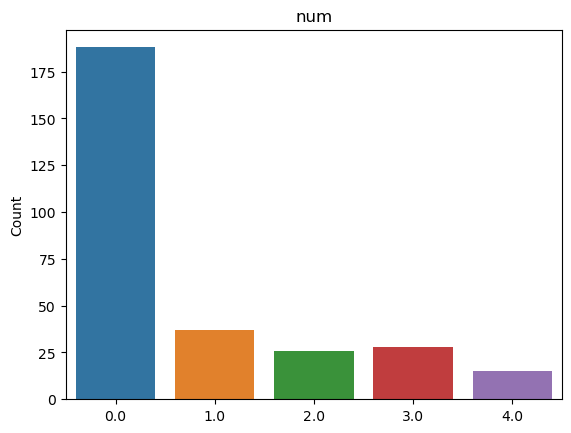

In [73]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="num")
plt.xlabel("")
plt.ylabel("Count")
plt.title("num")

In [65]:
# 결측치 확인
df.isnull().sum()

age         1
sex         1
cp          1
trestbps    1
chol        1
fbs         1
restecg     1
thalach     1
exang       1
oldpeak     1
slope       1
ca          1
thal        1
num         1
dtype: int64

In [72]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [67]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48.0,0.0,2.0,-9.0,308.0,0.0,1.0,-9.0,-9.0,2.0,1.0,-9.0,-9.0,0.0
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,-9.0,-9.0,0.0


In [74]:
X=df.drop('num',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0


In [76]:
y=df['num']
y.value_counts()

0.0    188
1.0     37
3.0     28
2.0     26
4.0     15
Name: num, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [78]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [79]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(260, 5, 13) (260,)
(26, 5, 13) (26,)


In [80]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [81]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout



In [82]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]


In [86]:
input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer) 
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(2, activation = "sigmoid")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 13)]           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             2560      
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                12352     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 15,042
Trainable params: 15,042
Non-trainable params: 0
_________________________________________________________________


In [87]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.1)

Epoch 1/30


2024-02-20 13:56:46.393378: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


ValueError: in user code:

    File "/Users/ohheungchan/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/ohheungchan/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/ohheungchan/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/ohheungchan/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/ohheungchan/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/Users/ohheungchan/anaconda3/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/ohheungchan/anaconda3/lib/python3.10/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/ohheungchan/anaconda3/lib/python3.10/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/ohheungchan/anaconda3/lib/python3.10/site-packages/keras/losses.py", line 2156, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/Users/ohheungchan/anaconda3/lib/python3.10/site-packages/keras/backend.py", line 5707, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 5)).
